## Ejemplo 01
En este ejemplo se condensan todos los ejemplos de la sesión 06, debido a que estan encadenados uno tras otro. Sin embargo iré describiendo uno tras otro paso. Primero cargaremos el dataset de cardiología del hospital de Cleveland, el cual ya he limpiado previamente

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataframe_cardio = pd.read_csv('dataset_cardio.csv')
dataframe_cardio.head(10)

edad  género  dolor de pecho  presión sanguínea  colesterol  \
0  63.0     1.0             1.0              145.0       233.0   
1  67.0     1.0             4.0              160.0       286.0   
2  67.0     1.0             4.0              120.0       229.0   
3  37.0     1.0             3.0              130.0       250.0   
4  41.0     0.0             2.0              130.0       204.0   
5  56.0     1.0             2.0              120.0       236.0   
6  62.0     0.0             4.0              140.0       268.0   
7  57.0     0.0             4.0              120.0       354.0   
8  63.0     1.0             4.0              130.0       254.0   
9  53.0     1.0             4.0              140.0       203.0   

   nivel de glucosa  ECG  Pulso  Angina  depresión ST  curva ST  Vesiculas  \
0               1.0  2.0  150.0     0.0           2.3       3.0        0.0   
1               0.0  2.0  108.0     1.0           1.5       2.0        3.0   
2               0.0  2.0  129.0     1.0           2.6       2.0        2.0   
3               0.0  0.0  187.0     0.0           3.5       3.0        0.0   
4               0.0  2.0  172.0     0.0           1.4       1.0        0.0   
5               0.0  0.0  178.0     0.0           0.8       1.0        0.0   
6               0.0  2.0  160.0     0.0           3.6       3.0        2.0   
7               0.0  0.0  163.0     1.0           0.6       1.0        0.0   
8               0.0  2.0  147.0     0.0           1.4       2.0        1.0   
9               1.0  2.0  155.0     1.0           3.1       3.0        0.0   

   Defectos  Resultado  
0       6.0          0  
1       3.0          2  
2       7.0          1  
3       3.0          0  
4       3.0          0  
5       3.0          0  
6       3.0          3  
7       3.0          0  
8       7.0          2  
9       7.0          1

Transformamos el dataframe entero a NumPy, y normalizamos los datos de la columna 13 (resultado) en valores 0 y 1, para poder utilizarlos. 0 = pacientes sanos, 1 = pacientes enfermos.

In [3]:
#Transformamos el dataframe a Numpy
datos_cardio = dataframe_cardio.to_numpy()

#Y ahora hacemos que solo sean 2 valores, 0 y 1:
for counter in range(0,datos_cardio.shape[0]):
    if(datos_cardio[counter,13] > 0):
        datos_cardio[counter,13] = 1

Vamos a separar los datos en pacientes sanos y enfermos para poderlos catalogar mejor en un plot

In [4]:
#Siguiente paso: filtramos el dataset en pacientes sanos y enfermos.
pacientes_sanos = datos_cardio[np.where(datos_cardio[:,13] == 0)]
pacientes_enfermos = datos_cardio[np.where(datos_cardio[:,13] == 1)]
print("Pacientes sanos:")
print(pacientes_sanos)

print("Pacientes enfermos:")
print(pacientes_enfermos)

Pacientes sanos:
[[63.  1.  1. ...  0.  6.  0.]
 [37.  1.  3. ...  0.  3.  0.]
 [41.  0.  2. ...  0.  3.  0.]
 ...
 [56.  1.  2. ...  0.  3.  0.]
 [55.  0.  2. ...  0.  3.  0.]
 [41.  1.  2. ...  0.  3.  0.]]
Pacientes enfermos:
[[67.  1.  4. ...  3.  3.  1.]
 [67.  1.  4. ...  2.  7.  1.]
 [62.  0.  4. ...  2.  3.  1.]
 ...
 [68.  1.  4. ...  2.  7.  1.]
 [57.  1.  4. ...  1.  7.  1.]
 [57.  0.  2. ...  1.  3.  1.]]


Podemos hacer un plot de datos sanos y enfermos entremezclados con scatter. La variable c sirve para separar en colores un dataset, de forma automática.

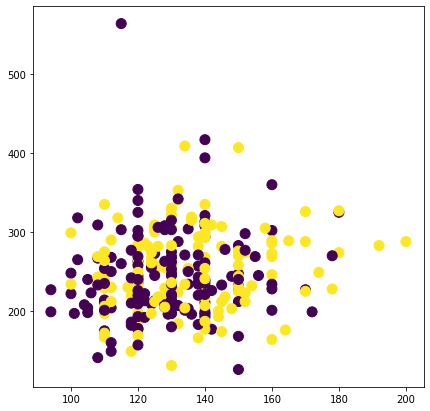

In [5]:
# Plot...
plt.figure(figsize=(7,7))
plt.scatter(datos_cardio[:,3], datos_cardio[:,4], c=datos_cardio[:,13], s=100)

En este ejemplo vamos a plottear pacientes sanos vs pacientes enfermos, en el eje X pondremos la presión sanguínea y en el eje Y colocaremos el colesterol. 

Plotteando: presión sanguínea(X) vs colesterol(Y)


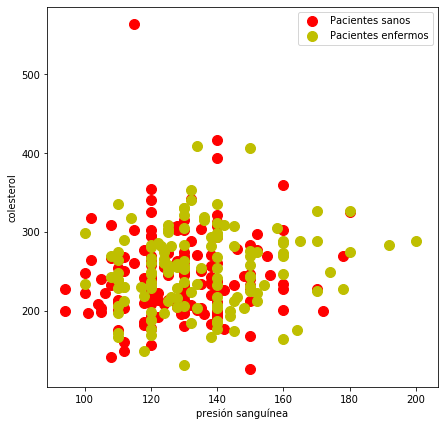

In [6]:
caracteristica_x = 3
caracteristica_y = 4
columnas = dataframe_cardio.columns
print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

plt.figure(figsize=(7,7))
plt.scatter(pacientes_sanos[:,caracteristica_x], pacientes_sanos[:,caracteristica_y], 
            color='r', s=100, label='Pacientes sanos')
plt.scatter(pacientes_enfermos[:,caracteristica_x], pacientes_enfermos[:,caracteristica_y],
            color='y', s=100, label='Pacientes enfermos')

plt.xlabel(columnas[caracteristica_x])
plt.ylabel(columnas[caracteristica_y])
plt.legend(loc='upper right')
plt.show()

### SubPlots 
Para poder crear subplots primero hemos de crear una función que haga el plot que necesitamos, para ello le pasaremos como parámetro el plot donde debe de dibujarse los datos.

In [18]:
def dibujarScatter(plt, caracteristica_x, caracteristica_y):
    columnas = dataframe_cardio.columns
    print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

    plt.scatter(pacientes_sanos[:,caracteristica_x], pacientes_sanos[:,caracteristica_y], 
                color='r', s=100, label='Pacientes sanos')
    plt.scatter(pacientes_enfermos[:,caracteristica_x], pacientes_enfermos[:,caracteristica_y],
                color='y', s=100, label='Pacientes enfermos')

    plt.set_xlabel(columnas[caracteristica_x])
    plt.set_ylabel(columnas[caracteristica_y])
    plt.legend(loc='upper right')

Generamos un arreglo de 2x2 subplots, en una figura de 10 x 10 pulgadas, y dibujamos con la función de arriba cada uno de los subplots.

Plotteando: presión sanguínea(X) vs colesterol(Y)
Plotteando: nivel de glucosa(X) vs ECG(Y)
Plotteando: presión sanguínea(X) vs depresión ST(Y)
Plotteando: edad(X) vs Angina(Y)


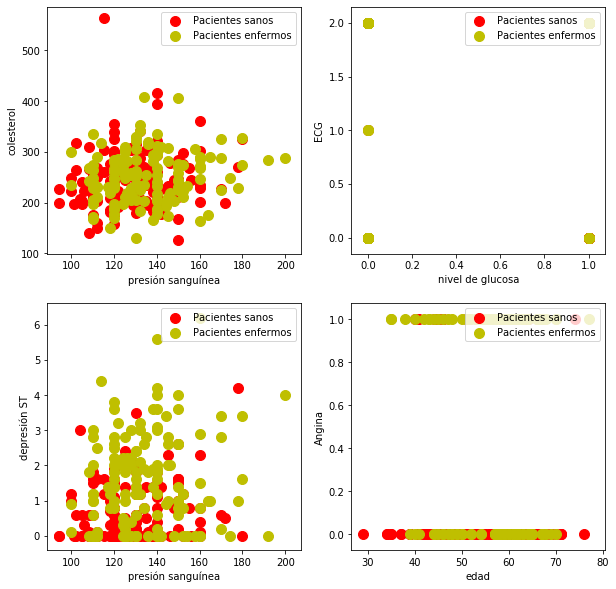

In [27]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

#El plot 1:
caracteristica_x = 3
caracteristica_y = 4
dibujarScatter(axs[0,0],caracteristica_x, caracteristica_y)

caracteristica_x = 5
caracteristica_y = 6
dibujarScatter(axs[0,1],caracteristica_x, caracteristica_y)

caracteristica_x = 3
caracteristica_y = 9
dibujarScatter(axs[1,0],caracteristica_x, caracteristica_y)

caracteristica_x = 0
caracteristica_y = 8
dibujarScatter(axs[1,1],caracteristica_x, caracteristica_y)


## Plots en 3D
En este ejemplo vamos a dibujar un plot en 3D

In [40]:
from mpl_toolkits.mplot3d import Axes3D

Plotteando: presión sanguínea(X) - colesterol(Y) - nivel de glucosa(Z)


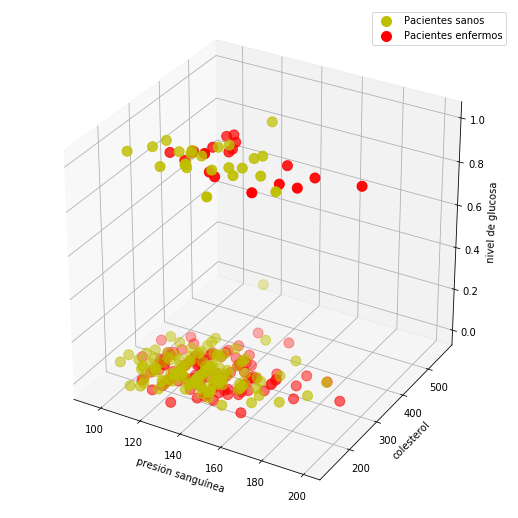

In [41]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

columnas = dataframe_cardio.columns
print("Plotteando: "
      +columnas[caracteristica_x]+"(X) - "
      +columnas[caracteristica_y]+"(Y) - "
      +columnas[caracteristica_z]+"(Z)")

ax.scatter(pacientes_sanos[:,caracteristica_x],
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
          color='y', s=100, label='Pacientes sanos')

ax.scatter(pacientes_enfermos[:,caracteristica_x],
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
          color='r', s=100, label='Pacientes enfermos')

ax.set_xlabel(columnas[caracteristica_x])
ax.set_ylabel(columnas[caracteristica_y])
ax.set_zlabel(columnas[caracteristica_z])

plt.legend(loc='upper right')
plt.show()

## Subplots en 3D
En este ejemplo vamos a dibujar varios subplots, y por ello vamos a crar una función similar a la anterior. Toma en cuenta que plotteos en 3D tienen algunos cambios en su forma de invocarse.

In [29]:
def plottear3D(plotArea, caracteristica_x, caracteristica_y, caracteristica_z):
    columnas = dataframe_cardio.columns
    print("Plotteando: "
          +columnas[caracteristica_x]+"(X) - "
          +columnas[caracteristica_y]+"(Y) - "
          +columnas[caracteristica_z]+"(Z)")

    plotArea.scatter(pacientes_sanos[:,caracteristica_x],
               pacientes_sanos[:,caracteristica_y],
               pacientes_sanos[:,caracteristica_z],
              color='y', s=100, label='Pacientes sanos')

    plotArea.scatter(pacientes_enfermos[:,caracteristica_x],
               pacientes_enfermos[:,caracteristica_y],
               pacientes_enfermos[:,caracteristica_z],
              color='r', s=100, label='Pacientes enfermos')

    plotArea.set_xlabel(columnas[caracteristica_x])
    plotArea.set_ylabel(columnas[caracteristica_y])
    plotArea.set_zlabel(columnas[caracteristica_z])

    plotArea.legend(loc='upper right')

Plotteando: presión sanguínea(X) - colesterol(Y) - nivel de glucosa(Z)
Plotteando: nivel de glucosa(X) - ECG(Y) - nivel de glucosa(Z)
Plotteando: Pulso(X) - Angina(Y) - nivel de glucosa(Z)
Plotteando: depresión ST(X) - curva ST(Y) - nivel de glucosa(Z)


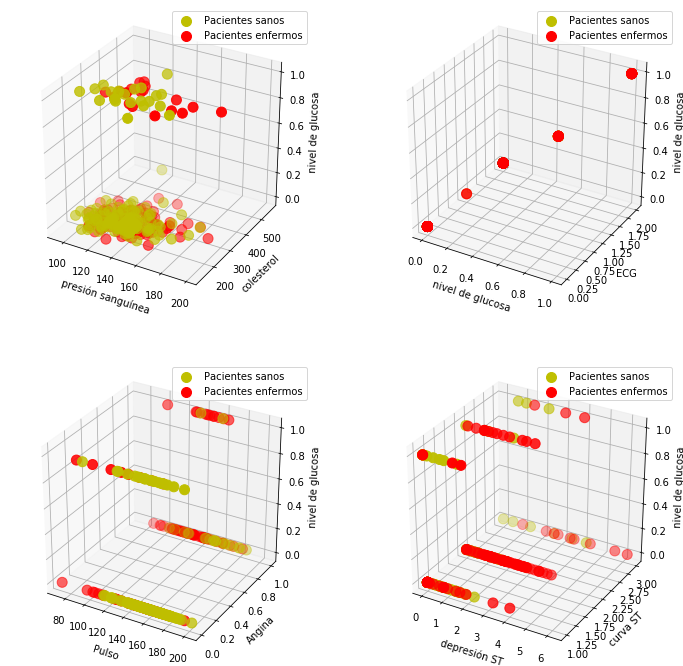

In [60]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

fig = plt.figure(figsize = (12,12))
ax3D_1 = fig.add_subplot(2,2,1, projection='3d')
ax3D_2 = fig.add_subplot(2,2,2, projection='3d')
ax3D_3 = fig.add_subplot(2,2,3, projection='3d')
ax3D_4 = fig.add_subplot(2,2,4, projection='3d')

caracteristica_x = 3
caracteristica_y = 4
caracetristica_z = 5
plottear3D(ax3D_1, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 5
caracteristica_y = 6
caracetristica_z = 7
plottear3D(ax3D_2, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 7
caracteristica_y = 8
caracetristica_z = 9
plottear3D(ax3D_3, caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 9
caracteristica_y = 10
caracetristica_z = 11
plottear3D(ax3D_4, caracteristica_x, caracteristica_y, caracteristica_z)